<a href="https://colab.research.google.com/github/savitskaya-om/python/blob/main/project/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load Data**

In [2]:
!git clone https://github.com/Kokkalo4/Kaggle-SF-Salaries 

Cloning into 'Kaggle-SF-Salaries'...
remote: Enumerating objects: 19, done.
remote: Total 19 (delta 0), reused 0 (delta 0), pack-reused 19
Unpacking objects: 100% (19/19), done.


In [55]:
sal = pd.read_csv("Kaggle-SF-Salaries/Salaries.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**Overview**

In [33]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [34]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [35]:
sal.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [36]:
sal.describe(include = ['O'])

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,Agency,Status
count,148654,148654,148049.0,148654.0,148654.0,112495.0,148654,38119
unique,110811,2159,109900.0,66555.0,84968.0,99635.0,1,2
top,Kevin Lee,Transit Operator,0.0,0.0,0.0,0.0,San Francisco,FT
freq,13,7036,875.0,66103.0,35218.0,1053.0,148654,22334


**Clean data**

Data types & not informative data

In [56]:
# convert numeric columns to float, text column to string instead of object.
sal[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']] = sal[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']].apply(pd.to_numeric, errors='coerce')
sal[['EmployeeName', 'JobTitle']] = sal[['EmployeeName', 'JobTitle']].astype('string', errors='ignore')

# convert year column to datetime type
sal['Year'] = pd.to_datetime(sal.Year, format='%Y')

# drop ['Notes', 'Status'] columns as there are many missing values and column 'Agency' as it is not informative (contains just one unique value)
sal.drop(columns = ['Notes','Status', 'Agency'], inplace=True)

In [57]:
sal.dtypes

Id                           int64
EmployeeName                string
JobTitle                    string
BasePay                    float64
OvertimePay                float64
OtherPay                   float64
Benefits                   float64
TotalPay                   float64
TotalPayBenefits           float64
Year                datetime64[ns]
dtype: object

In [64]:
#check whether 'BasePay' column contains zeros (not informative)
sal.BasePay.value_counts()

54703.00     338
55026.00     297
48472.40     210
65448.00     153
121068.00    152
            ... 
65402.73       1
68818.72       1
73810.54       1
56242.68       1
15.50          1
Name: BasePay, Length: 109488, dtype: int64

In [63]:
sal.drop(sal[sal.BasePay == 0].index, inplace = True)

Missing values

In [68]:
sal.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
count,147356.000000,147356.000000,147356.000000,147352.000000,111645.000000,147356.000000,147356.000000
mean,74252.486896,66912.107734,5109.194980,3641.296562,25188.124131,75385.824149,94469.730597
std,42868.850421,42406.044045,11494.016361,8001.851699,15319.157266,50290.657175,62505.165775
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,0.000000,-33.890000
25%,37291.750000,35673.145000,0.000000,0.000000,12368.550000,37935.157500,46115.105000
50%,74550.500000,65423.250000,0.000000,804.655000,28731.030000,71862.620000,93013.515000
75%,111389.250000,94851.022500,4732.102500,4242.935000,35623.300000,106277.412500,133304.340000
max,148653.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000


In [66]:
# fill missing values in columns ['BasePay', 'OvertimePay', 'OtherPay'] with their respective column means
sal[['BasePay', 'OvertimePay', 'OtherPay']] = sal[['BasePay', 'OvertimePay', 'OtherPay']].fillna(sal[['BasePay', 'OvertimePay']].mean())

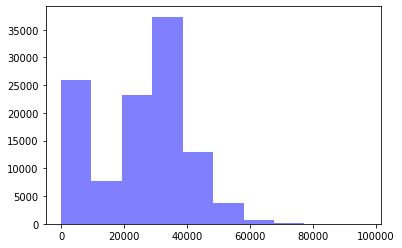

In [67]:
plt.hist(sal.Benefits,  facecolor='blue', alpha=0.5)
plt.show()

1.	Как со временем менялись зарплаты между разными группами (группировка по Department - fire, medicine, police)? (максимальная, медианная, средняя)
2.	Как распределяются базовая оплата, сверхурочная работа и льготы между разными группами? Нужно построить диаграммы по распределению со временем для каждого департамента по базовым, сверхурочным и льготам
3.	Как распределяется бюджет на разные группы (department) с течением времени?
4.	Какое количество людей в каждом департаменте? 
5.	Какое количество с разным уровнем дохода? (гистограмма с шагом в 5к) 
6.	На базе линейной регрессии постройте прогноз по тому, какие будут закупке в следующий год по каждому департаменту


In [53]:
sal['JobTitle'].str.lower().value_counts()

transit operator                           9424
special nurse                              5791
registered nurse                           4955
custodian                                  3214
firefighter                                3153
                                           ... 
hh mechanical shop sprv                       1
auto body&fender wrk asst sprv                1
transit power line worker supervisor ii       1
power generation technician i                 1
secretary,juvenile probation commission       1
Name: JobTitle, Length: 1637, dtype: Int64

**Data Analysis**

**Conclusions**